# Seminar 1 (Linear models, Optimization)

In this seminar you will implement a simple linear classifier using numpy and your brain.

## Two-dimensional classification

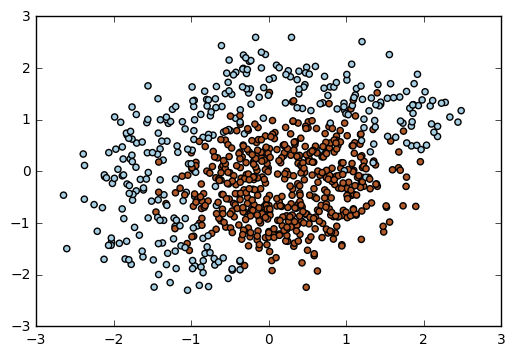

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
X = X[ind,:]
m = np.array([[1, 1], [-2, 1]])
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [2]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, w, loss, n_iter):
    plt.clf()
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Your task starts here**

Implement classification with hinge loss.
You should use up to the second order terms of X for your classifier, as provided by function **expand**.

In [3]:
def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1
    return X_

def classify(X, w):
    
    dotproduct = expand(X).dot(w)
    
    return np.sign(dotproduct)

def compute_loss(X, y, w):
    
    dotproduct = expand(X).dot(w)
    
    margin = dotproduct * y
    
    #warning, np.maximum is not same as np.max, read the description!
    hinge = np.maximum(0,1-margin)
    
    return np.mean(hinge)
    

def compute_grad(X, y, w):
    
    X_exp = expand(X)

    dotproduct = X_exp.dot(w)
    
    margin = dotproduct * y
    
    
    # if True, gradient is zero. (where hinge loss equals 0)
    is_zero =  1 - margin  <= 0
    
    #gradients for each sample of shape [n_samples, n_features]
    
    #margin = X*w * y , derivative of margin over W = X*y
    #derivative of max(1-margin,0) is -margin if 1-margin>0, else 0
    
    grad_term = -(X_exp*y[:,None]) * (~is_zero[:,None])
    #                     ^-- [:,None] transforms vector of [samples] into
    #                          a column-matrix [samples,1] in order for numpy
    #                          to multiply it over X_exp by broadcasting.
    
    #sum over samples batch
    return grad_term.sum(axis=0)
        

Find an optimal learning rate for gradient descent for given batch size. 
You can see the example of correct output below this cell before you run it.

**Don't change the batch size!**

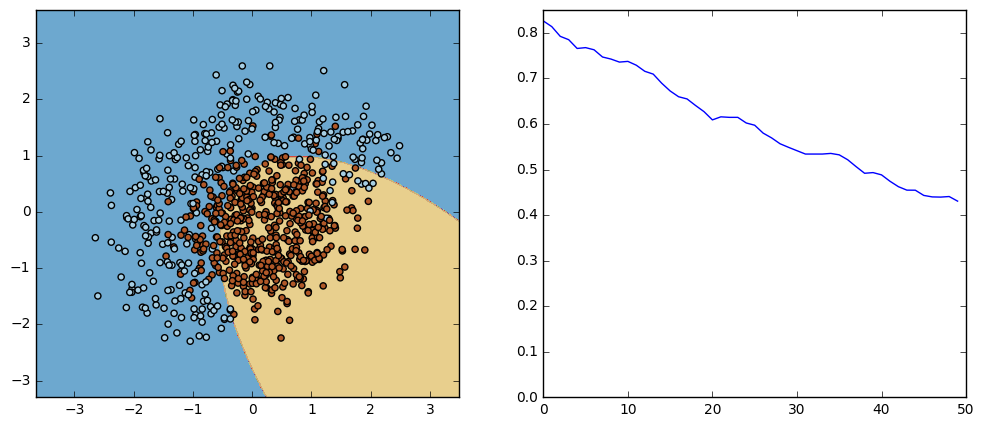

In [4]:
w = np.array([1,0,0,0,0,0])

alpha = 0.01 # learning rate

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

# YOUR TURN

[this part is left for you to complete]

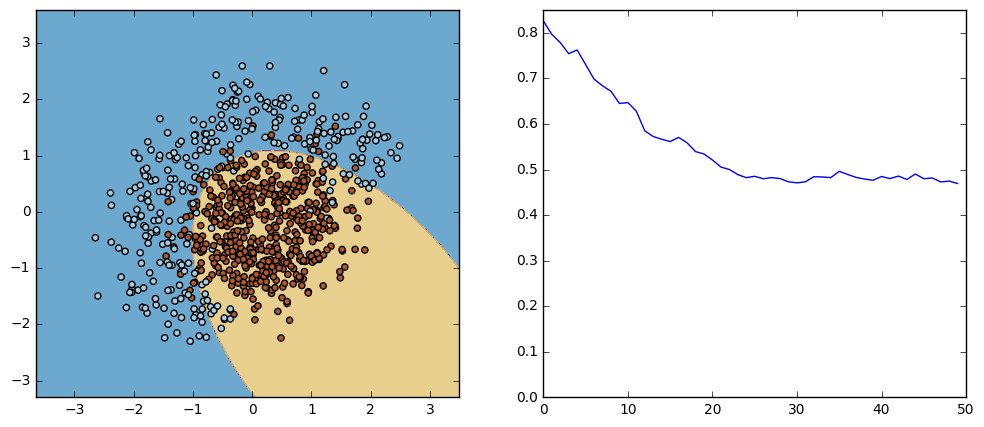

In [11]:
w = np.array([1,0,0,0,0,0])

alpha = 0.05 # learning rate
mu    = 0.8 # momentum

n_iter = 50
batch_size = 8
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))

for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    w = w - alpha * (mu * w + (1 - mu)*compute_grad(X[ind,:], y[ind], w))

visualize(X, y, w, loss, n_iter)
plt.clf()

Implement RMSPROP algorithm


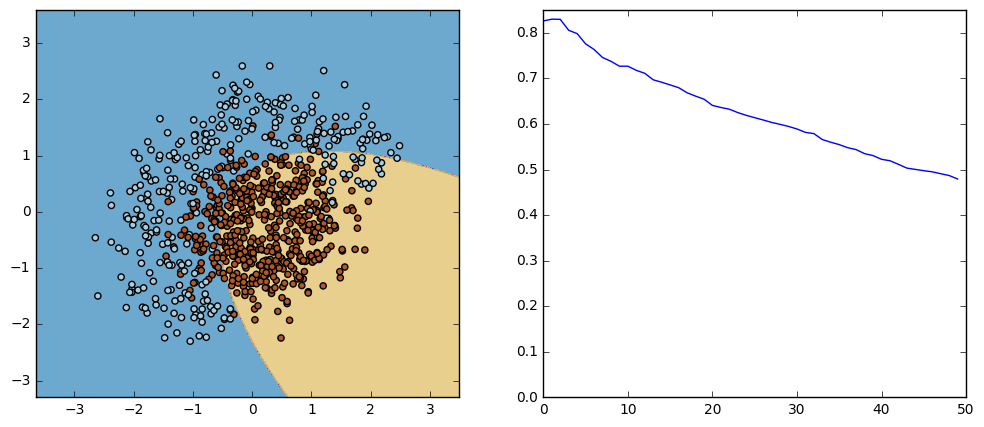

In [19]:
w = np.array([1,0,0,0,0,0])

alpha = 0.01 # learning rate
mu    = 0.9 # momentum
epsilon=1e-06
n_iter = 50
batch_size = 8
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
E = 0
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    grad = compute_grad(X[ind,:], y[ind], w)
    E = mu * E + (1 - mu) *grad*grad
    w = w - alpha * (1.0/np.sqrt(E+epsilon)*compute_grad(X[ind,:], y[ind], w))
    #update w here

visualize(X, y, w, loss, n_iter)
plt.clf()

Which optimization method do you consider the best? Type your answer in the cell below

In general, they both have their uses, as simple sgd with momentum may be cheap to compute and fast to converge with big step. But it may overshoot, and then take long to reach optimum.
However, if you wish to depend less on chosen learning rate, adaptive methods like Adagrad and RMSPROP are more preferrable. They converge a bit slower, but more steadily

# Bonus quest 
try the same thing for Adagrad and anything else you find suitable

adagrad

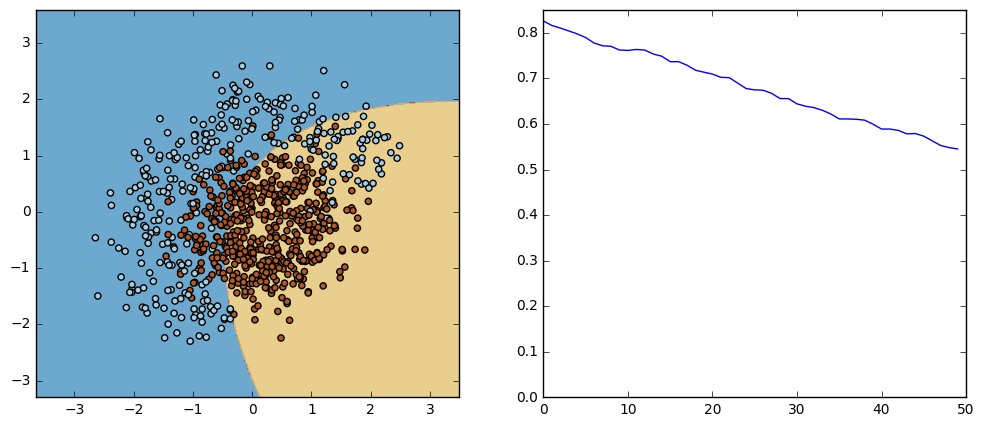

In [22]:
w = np.array([1,0,0,0,0,0])

alpha = 0.01 # learning rate
             # momentum
epsilon=1e-06
n_iter = 50
batch_size = 8
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    grad = compute_grad(X[ind,:], y[ind], w)
    E = grad*grad
    w = w - alpha * (1.0/np.sqrt(E+epsilon)*compute_grad(X[ind,:], y[ind], w))
    #update w here

visualize(X, y, w, loss, n_iter)
plt.clf()